Create a video file

In [1]:
import cv2
import os
import re


def images_to_video(image_folder, output_video, fps):
    """
    Converts a sequence of images in a folder to a video file.

    Parameters:
    - image_folder (str): Path to the folder containing images.
    - output_video (str): Path for the output video file.
    - fps (int): Frames per second for the video.
    """
    # Regular expression to capture the number in the filename (e.g., image_0.jpg, image_1315.jpg)
    def extract_number(filename):
        match = re.search(r'(\d+)', filename)
        return int(match.group(1)) if match else -1

    # Get list of images sorted by the numeric part of the filename
    images = sorted([img for img in os.listdir(image_folder) if img.endswith(".png")],
                    key=extract_number)

    # Ensure there are images to process
    if not images:
        print("No images found in the folder.")
        return

    # Read the first image to get the dimensions
    first_image_path = os.path.join(image_folder, images[0])
    frame = cv2.imread(first_image_path)
    height, width, layers = frame.shape

    # Define the codec and create a VideoWriter object
    fourcc = cv2.VideoWriter_fourcc(*'H264')  # Use 'XVID' for .avi files
    video_writer = cv2.VideoWriter(output_video, fourcc, fps, (width, height))

    # Process each image and write to video
    for image in images:
        img_path = os.path.join(image_folder, image)
        frame = cv2.imread(img_path)
        video_writer.write(frame)

    # Release the VideoWriter object
    video_writer.release()
    print(f"Video saved as {output_video}")

# Example usage:
image_folder = '/home/su/MagPIE/Talbot_UGV/magpie2Dataset_1/mav0/cam0/data' 
output_video = '/home/su/MagPIE/Talbot_UGV/magpie2Dataset_1/mav0/traj1_4x.mp4'
fps = 100

images_to_video(image_folder, output_video, fps)


OpenCV: FFMPEG: tag 0x34363248/'H264' is not supported with codec id 27 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x31637661/'avc1'
[ERROR:0@0.083] global cap_ffmpeg_impl.hpp:3133 open Could not find encoder for codec_id=27, error: Encoder not found
[ERROR:0@0.083] global cap_ffmpeg_impl.hpp:3211 open VIDEOIO/FFMPEG: Failed to initialize VideoWriter


Video saved as /home/su/MagPIE/Talbot_UGV/magpie2Dataset_1/mav0/traj1_4x.mp4


In [4]:
import subprocess
import os

def images_to_video_ffmpeg(image_folder, output_video, fps):

    # Ensure output folder exists
    if not os.path.exists(image_folder):
        print("Image folder does not exist.")
        return

    # Construct the ffmpeg command
    command = [
        'ffmpeg',
        '-framerate', str(fps),
        '-i', os.path.join(image_folder, 'image_%04d.png'),
        '-c:v', 'libx264',
        '-pix_fmt', 'yuv420p',
        output_video
    ]

    try:
        # Run the ffmpeg command
        subprocess.run(command, check=True)
        print(f"Video saved as {output_video}")
    except subprocess.CalledProcessError as e:
        print(f"Error occurred: {e}")
    except FileNotFoundError:
        print("ffmpeg not found. Please install it and try again.")

# Example usage:
image_folder = '/home/su/MagPIE/Talbot_UGV/magpie2Dataset_1/mav0/cam0/data' 
output_video = '/home/su/MagPIE/Talbot_UGV/magpie2Dataset_1/mav0/traj1_16x.mp4'
fps = 128

images_to_video_ffmpeg(image_folder, output_video, fps)


ffmpeg version 4.2.7-0ubuntu0.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 9 (Ubuntu 9.4.0-1ubuntu1~20.04.1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-avresample --disable-filter=resample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librsvg --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --e

Video saved as /home/su/MagPIE/Talbot_UGV/magpie2Dataset_1/mav0/traj1_16x.mp4


frame= 1991 fps= 85 q=-1.0 Lsize=    7842kB time=00:00:16.56 bitrate=3878.0kbits/s dup=0 drop=131 speed=0.707x    
video:7819kB audio:0kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: 0.293625%
[libx264 @ 0x5578a656cb40] frame I:11    Avg QP:26.38  size: 22784
[libx264 @ 0x5578a656cb40] frame P:634   Avg QP:29.22  size:  6238
[libx264 @ 0x5578a656cb40] frame B:1346  Avg QP:30.67  size:  2824
[libx264 @ 0x5578a656cb40] consecutive B-frames:  8.9%  2.1%  2.0% 87.0%
[libx264 @ 0x5578a656cb40] mb I  I16..4: 36.9% 49.6% 13.6%
[libx264 @ 0x5578a656cb40] mb P  I16..4:  1.5%  1.5%  0.2%  P16..4: 40.0%  4.2%  3.4%  0.0%  0.0%    skip:49.4%
[libx264 @ 0x5578a656cb40] mb B  I16..4:  0.1%  0.1%  0.0%  B16..8: 45.7%  1.1%  0.1%  direct: 0.4%  skip:52.5%  L0:46.8% L1:52.6% BI: 0.7%
[libx264 @ 0x5578a656cb40] 8x8 transform intra:47.0% inter:89.2%
[libx264 @ 0x5578a656cb40] coded y,uvDC,uvAC intra: 32.4% 36.7% 4.9% inter: 6.0% 10.5% 0.1%
[libx264 @ 0x5578a656cb40] i16 v,h,dc,p: 42

Parse annotation data

In [6]:
import json
import csv

annotation_file = 'rtk_cam_2_reg_annotation/Cam_2_1000_1374.json'
csv_path        = 'rtk_cam_2_reg_annotation/rtk_cam_2_reg_gt.csv'
with open(annotation_file, 'r') as j:
    data = json.load(j)
# Open the text file and the CSV file
with open(csv_path, 'a', newline='') as csv_file:
    csv_writer = csv.writer(csv_file)
    csv_writer.writerow(['image', 'ID', 'x1', 'y1', 'x2', 'y2', 'x3', 'y3', 'x4', 'y4'])
    for i in range(100):
        filepath = data[i]['image']
        filename = filepath.split('-')[-1]
        print(filename)
        if any('keypoints' in item for item in data[i]):
            print(data[i]["keypoints"][0])
            height, width = data[i]["keypoints"][0]["original_height"], data[i]["keypoints"][0]["original_width"]

            tl_x = data[i]["keypoints"][0]['x'] / 100 * width 
            tl_y = data[i]["keypoints"][0]['y'] / 100 * height
            tr_x = data[i]["keypoints"][1]['x'] / 100 * width
            tr_y = data[i]["keypoints"][1]['y'] / 100 * height
            bl_x = data[i]["keypoints"][2]['x'] / 100 * width
            bl_y = data[i]["keypoints"][2]['y'] / 100 * height
            br_x = data[i]["keypoints"][3]['x'] / 100 * width
            br_y = data[i]["keypoints"][3]['y'] / 100 * height
            tag_id = 1
            csv_writer.writerow([filename, tag_id, tl_x, tl_y, tr_x, tr_y, br_x, br_y, bl_x, bl_y])
        

image_1000.jpg
{'x': 50.33187487724996, 'y': 0.9613218506619208, 'width': 0.29574861367837335, 'keypointlabels': ['Top_Left_Corner'], 'original_width': 640, 'original_height': 512}
image_1001.jpg
{'x': 50.339710645696975, 'y': 1.1407685961188125, 'width': 0.29574861367837335, 'keypointlabels': ['Top_Left_Corner'], 'original_width': 640, 'original_height': 512}
image_1002.jpg
{'x': 50.33405944360033, 'y': 1.179797011380638, 'width': 0.29574861367837335, 'keypointlabels': ['Top_Left_Corner'], 'original_width': 640, 'original_height': 512}
image_1003.jpg
{'x': 50.32284922854262, 'y': 1.2605763110608104, 'width': 0.29574861367837335, 'keypointlabels': ['Top_Left_Corner'], 'original_width': 640, 'original_height': 512}
image_1004.jpg
{'x': 50.3404153408396, 'y': 1.399134602079296, 'width': 0.29574861367837335, 'keypointlabels': ['Top_Left_Corner'], 'original_width': 640, 'original_height': 512}
image_1005.jpg
{'x': 50.37340448064824, 'y': 1.381331108763102, 'width': 0.29574861367837335, 'ke

In [16]:
annotation_file = 'rtk_cam_2_reg_gt_2.json'

with open(annotation_file, 'r') as j:
    data = json.load(j)
len(data)


100

Histogram equalization

True

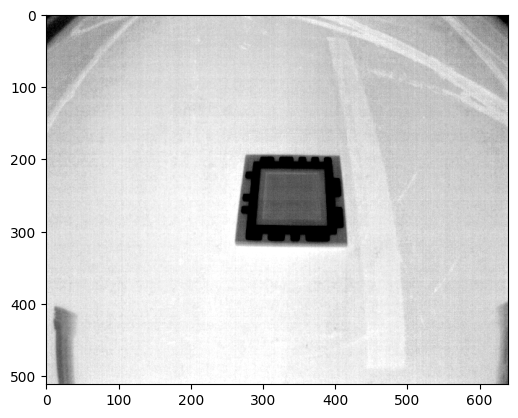

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


# Load the 16-bit grayscale image
image_16bit = cv2.imread('rtk_cam_1_reg_raw/image_50.tiff', cv2.IMREAD_UNCHANGED)

# Ensure the image is 16-bit
if image_16bit.dtype != np.uint16:
    raise ValueError("Input image must be 16-bit")

# Calculate the histogram
hist, bin_edges = np.histogram(image_16bit, bins=65536, range=(0, 65535))

# Find the informative range (e.g., 2% to 98% percentile)
low_percentile = np.percentile(image_16bit, 2)
high_percentile = np.percentile(image_16bit, 98)

# Map the informative range to [0, 255]
image_rescaled = np.clip(image_16bit, low_percentile, high_percentile)
image_rescaled = ((image_rescaled - low_percentile) / (high_percentile - low_percentile) * 255).astype(np.uint8)

# Save or display the 8-bit image
plt.imshow(image_rescaled, cmap='gray')
cv2.imwrite('he.jpg', image_rescaled)


True

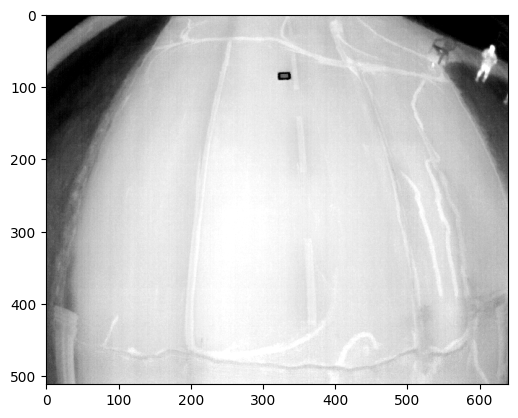

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


# Load the 16-bit grayscale image
image_16bit = cv2.imread('rtk_cam_1_reg_raw/image_300.tiff', cv2.IMREAD_UNCHANGED)

# Ensure the image is 16-bit
if image_16bit.dtype != np.uint16:
    raise ValueError("Input image must be 16-bit")

# Calculate the histogram
hist, bin_edges = np.histogram(image_16bit, bins=65536, range=(0, 65535))

# Find the informative range (e.g., 2% to 98% percentile)
low_percentile = np.percentile(image_16bit, 2)
high_percentile = np.percentile(image_16bit, 98)

# Map the informative range to [0, 255]
image_rescaled = np.clip(image_16bit, low_percentile, high_percentile)
image_rescaled = ((image_rescaled - low_percentile) / (high_percentile - low_percentile) * 255).astype(np.uint8)

# Save or display the 8-bit image
plt.imshow(image_rescaled, cmap='gray')
cv2.imwrite('he2.jpg', image_rescaled)


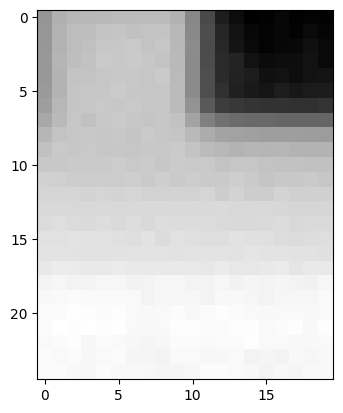

In [6]:
import cv2
import numpy as np

# Load the 16-bit grayscale image
image_16bit = cv2.imread('rtk_cam_1_reg_raw/image_50.tiff', cv2.IMREAD_UNCHANGED)

# Ensure the image is 16-bit
if image_16bit is None or image_16bit.dtype != np.uint16:
    raise ValueError("Input image must be a valid 16-bit grayscale image")

# Normalize the image to the range [0, 65535] (if not already)
normalized_image = cv2.normalize(image_16bit, None, alpha=0, beta=65535, norm_type=cv2.NORM_MINMAX)

# Scale down to the range [0, 255] for CLAHE
image_8bit = (normalized_image / 256).astype(np.uint8)

# Apply CLAHE
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))  # Adjust clipLimit and tileGridSize as needed
equalized_image = clahe.apply(image_8bit)

# Save or display the result
# cv2.imwrite('image_equalized.png', equalized_image)
plt.imshow(equalized_image[305:330,350:370], cmap='gray')


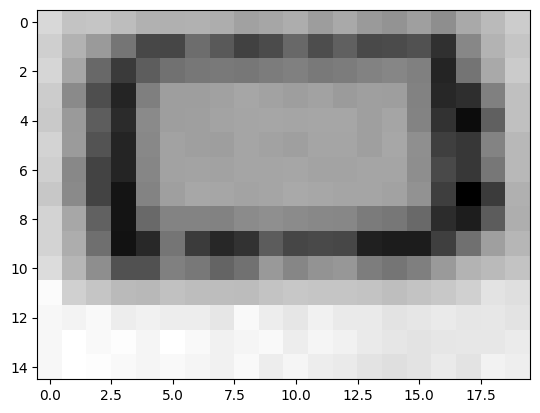

In [11]:
import cv2
import numpy as np

# Load the 16-bit grayscale image
image_16bit = cv2.imread('rtk_cam_1_reg_raw/image_300.tiff', cv2.IMREAD_UNCHANGED)

# Ensure the image is 16-bit
if image_16bit is None or image_16bit.dtype != np.uint16:
    raise ValueError("Input image must be a valid 16-bit grayscale image")

# Normalize the image to the range [0, 65535] (if not already)
normalized_image = cv2.normalize(image_16bit, None, alpha=0, beta=65535, norm_type=cv2.NORM_MINMAX)

# Scale down to the range [0, 255] for CLAHE
image_8bit = (normalized_image / 256).astype(np.uint8)

# Apply CLAHE
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))  # Adjust clipLimit and tileGridSize as needed
equalized_image = clahe.apply(image_8bit)

# Save or display the result
# cv2.imwrite('image_equalized.png', equalized_image)
plt.imshow(equalized_image[80:95, 320:340], cmap='gray')


In [8]:
import cv2
import numpy as np

# Load the 16-bit grayscale image
image_16bit = cv2.imread('rtk_cam_1_reg_raw/image_50.tiff', cv2.IMREAD_UNCHANGED)

min_val = np.min(image_16bit)
max_val = np.max(image_16bit)    
val_16 = image_16bit[305, 345]
val_8 = ((val_16 - min_val) / (max_val - min_val) * 255).astype(np.uint8)

print(val_16, val_8, min_val, max_val)

25226 28 24759 28867


In [12]:
import cv2
import numpy as np

# Load the 16-bit grayscale image
image_16bit = cv2.imread('rtk_cam_1_reg_raw/image_300.tiff', cv2.IMREAD_UNCHANGED)

min_val = np.min(image_16bit)
max_val = np.max(image_16bit)    
val_16 = image_16bit[84, 323]
val_8 = ((val_16 - min_val) / (max_val - min_val) * 255).astype(np.uint8)

print(val_16, val_8, min_val, max_val)

27362 36 27003 29504


In [13]:
import cv2
import numpy as np

# Load the 16-bit grayscale image
image_16bit = cv2.imread('rtk_cam_1_reg_raw/image_50.tiff', cv2.IMREAD_UNCHANGED)

min_val = np.min(image_16bit)
max_val = np.max(image_16bit)    
val_16 = image_16bit[305, 355]
val_8 = ((val_16 - min_val) / (max_val - min_val) * 255).astype(np.uint8)

print(val_16, val_8, min_val, max_val)

28095 207 24759 28867


In [14]:
import cv2
import numpy as np

# Load the 16-bit grayscale image
image_16bit = cv2.imread('rtk_cam_1_reg_raw/image_300.tiff', cv2.IMREAD_UNCHANGED)

min_val = np.min(image_16bit)
max_val = np.max(image_16bit)    
val_16 = image_16bit[90, 332]
val_8 = ((val_16 - min_val) / (max_val - min_val) * 255).astype(np.uint8)

print(val_16, val_8, min_val, max_val)

28234 125 27003 29504
